# Preprocesamiento de Imágenes MRI para Detección con YOLOv7

Este notebook contiene el flujo de trabajo para preprocesar imágenes de resonancia magnética (MRI) para entrenamiento con YOLOv7. El preprocesamiento incluye:

1. Normalización de brillo y contraste
2. Ecualización de histograma adaptativo (CLAHE)
3. Desenfoque gaussiano
4. Recorte de la región cerebral
5. Preparación de formato para YOLOv7

Las funciones de utilidad se han movido a `utils.py`.

La estructura del dataset es:
```
data/dataset/
├── Training/
└── Testing/
```

In [2]:
# Importar módulos y funciones necesarias
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Importar funciones desde utils.py
from utils import (
    normalize_image, apply_clahe, apply_gaussian_blur, crop_brain_region,
    get_dataset_info, preprocess_image, process_dataset, 
    visualize_preprocessing_steps
)

In [3]:
# Configuración de rutas y directorios
BASE_DIR = 'data/dataset'
TRAIN_DIR = os.path.join(BASE_DIR, 'Training')
TEST_DIR = os.path.join(BASE_DIR, 'Testing')
PROCESSED_DIR = os.path.join(BASE_DIR, 'Processed')
PROCESSED_TRAIN_DIR = os.path.join(PROCESSED_DIR, 'Training')

# Crear directorios para imágenes procesadas si no existen
for directory in [PROCESSED_DIR, PROCESSED_TRAIN_DIR]:
    if not os.path.exists(directory):
        os.makedirs(directory)
        print(f"Creado directorio: {directory}")

Creado directorio: data/dataset\Processed
Creado directorio: data/dataset\Processed\Training


In [4]:
# Explorar el dataset de entrenamiento
train_info = get_dataset_info(TRAIN_DIR)
print(f"Conjunto de entrenamiento:")
print(f"Total de imágenes: {train_info['total_images']}")
print(f"Total de etiquetas: {train_info['total_labels']}")
print(f"Ejemplos de imágenes: {[os.path.basename(f) for f in train_info['image_samples']]}")
print(f"Ejemplos de etiquetas: {[os.path.basename(f) for f in train_info['label_samples']]}")

Conjunto de entrenamiento:
Total de imágenes: 8582
Total de etiquetas: 0
Ejemplos de imágenes: ['g_1.jpg', 'g_10.jpg', 'g_100.jpg', 'g_1000.jpg', 'g_1001.jpg']
Ejemplos de etiquetas: []


In [5]:
# Procesamiento del conjunto de entrenamiento
process_dataset(TRAIN_DIR, PROCESSED_TRAIN_DIR)

Procesando 8582 imágenes...


100%|██████████| 8582/8582 [02:19<00:00, 61.68it/s]

Procesamiento completado. Imágenes guardadas en data/dataset\Processed\Training


Visualizando pasos de preprocesamiento para: g_1.jpg


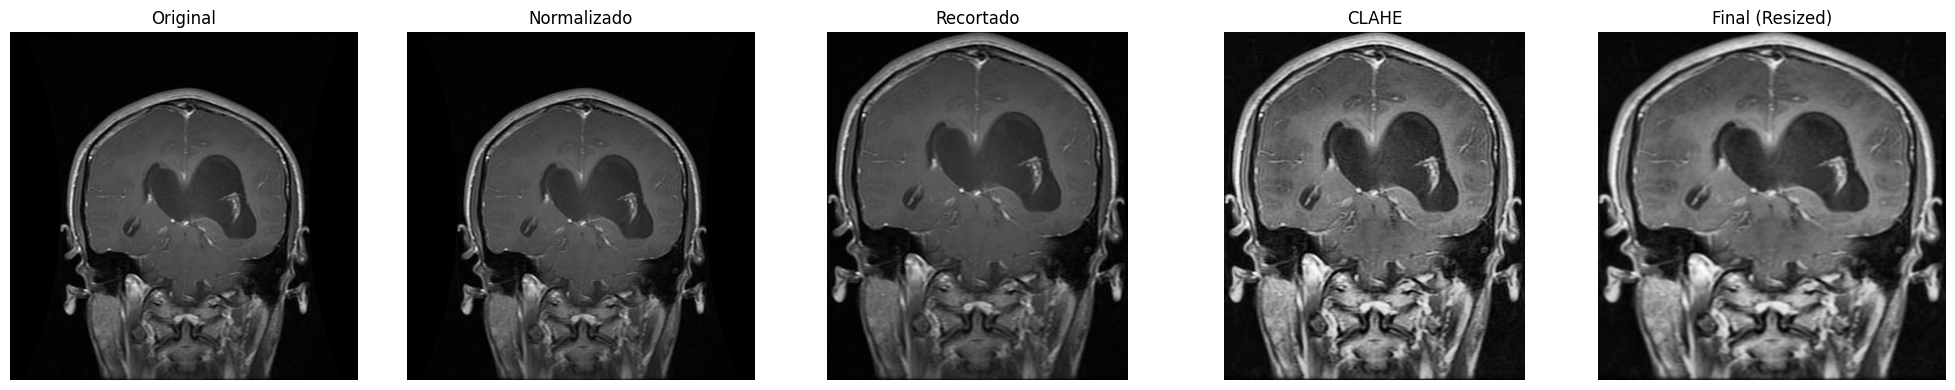

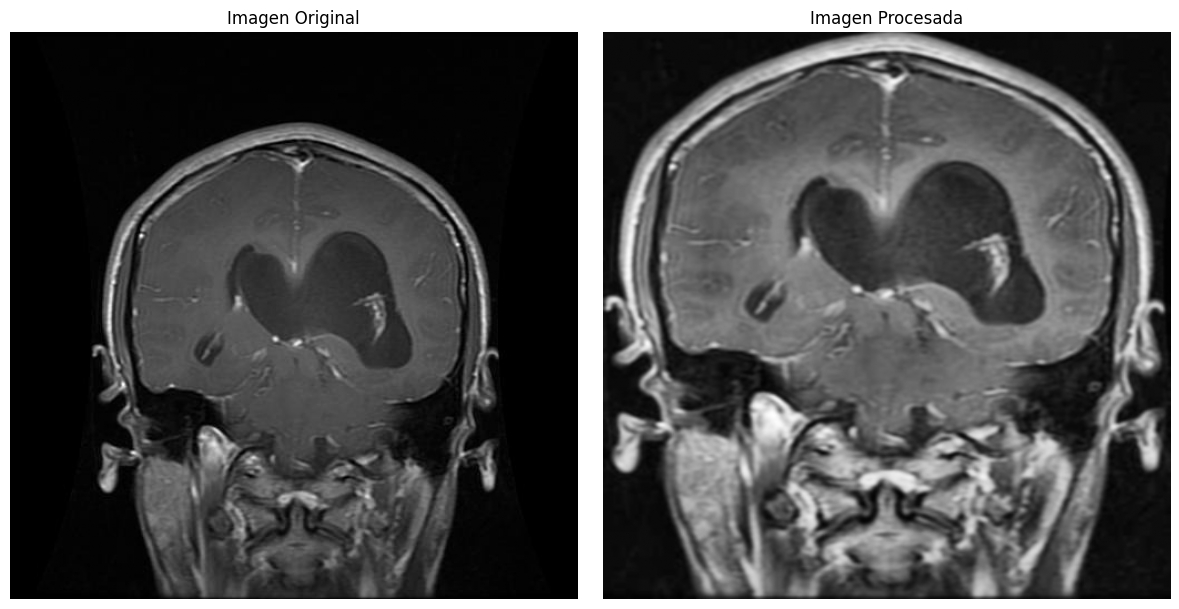

In [6]:
# Visualización de resultados si hay imágenes disponibles
if train_info['total_images'] > 0:
    sample_image = train_info['image_samples'][0]
    print(f"Visualizando pasos de preprocesamiento para: {os.path.basename(sample_image)}")
    visualize_preprocessing_steps(sample_image)

    # Comparar imagen original y procesada
    orig_img = cv2.imread(sample_image, cv2.IMREAD_GRAYSCALE)
    proc_img_path = os.path.join(PROCESSED_TRAIN_DIR, os.path.basename(sample_image))
    if os.path.exists(proc_img_path):
        proc_img = cv2.imread(proc_img_path, cv2.IMREAD_GRAYSCALE)
        
        # Visualizar comparación
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))
        axes[0].imshow(orig_img, cmap='gray')
        axes[0].set_title('Imagen Original')
        axes[1].imshow(proc_img, cmap='gray')
        axes[1].set_title('Imagen Procesada')
        
        for ax in axes:
            ax.axis('off')
        plt.tight_layout()
        plt.show()
else:
    print("No hay imágenes de ejemplo disponibles para visualizar")

# Resumen y siguientes pasos

El preprocesamiento se ha completado con éxito. Ahora puedes:

1. Usar las imágenes preprocesadas en `data/dataset/Processed/Training` para entrenar YOLOv7
2. Opcionalmente, generar aumentaciones de datos ejecutando el notebook de aumentación (`augmentacion.ipynb`)
3. Aplicar el mismo preprocesamiento al conjunto de prueba antes de la evaluación

Las imágenes procesadas están normalizadas, recortadas, y redimensionadas a 640x640 píxeles, listas para ser utilizadas con YOLOv7.